In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
import graphviz
import csv

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer

In [4]:
ins_df = pd.read_csv('insurance.csv')
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
X = pd.get_dummies(ins_df.iloc[:, :-1])
y = ins_df.loc[:, 'charges']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
pipe = make_pipeline(MinMaxScaler(), LinearRegression()).fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7958786376014415

In [8]:
pipe.named_steps['linearregression'].coef_, pipe.named_steps['linearregression'].intercept_

(array([ 1.15069979e+04,  1.23886402e+04,  2.21106880e+03, -6.63153624e+00,
         6.63153624e+00, -1.18283103e+04,  1.18283103e+04,  5.35344576e+02,
         3.42211643e+02, -5.44457080e+02, -3.33099139e+02]),
 9582.347435907923)

In [9]:
lr_coef = pipe.named_steps['linearregression'].coef_
lr_intercept = pipe.named_steps['linearregression'].intercept_
(pd.DataFrame(lr_coef)
.rename(dict(enumerate(X.columns)))
.apply(lambda df: df.div(df.sum(axis=0)))
)

,0
age,0.440768
bmi,0.474539
children,0.084694
sex_female,-0.000254
sex_male,0.000254
smoker_no,-0.453076
smoker_yes,0.453076
region_northeast,0.020506
region_northwest,0.013108
region_southeast,-0.020855


In [10]:
pipe = make_pipeline(MinMaxScaler(), 
SGDRegressor(loss='squared_error', penalty='l1', alpha=0.1, learning_rate='invscaling', max_iter=1000, random_state=0)).fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7947894067641075

In [11]:
pipe.named_steps['sgdregressor'].coef_, pipe.named_steps['sgdregressor'].intercept_, pipe.named_steps['sgdregressor'].n_iter_

(array([11593.79110741, 10382.67267152,  2205.8369832 ,  2278.09324513,
         2297.09892774, -9525.95351756, 14114.44893084,  1593.16722028,
         1395.66771951,   770.66960293,   802.38438972]),
 array([4588.49541328]),
 85)

In [12]:
lr_coef = pipe.named_steps['sgdregressor'].coef_
lr_intercept = pipe.named_steps['sgdregressor'].intercept_
(pd.DataFrame(lr_coef)
.rename(dict(enumerate(X.columns)))
.apply(lambda df: df.div(df.sum(axis=0)))
)

,0
age,0.305841
bmi,0.273892
children,0.058189
sex_female,0.060096
sex_male,0.060597
smoker_no,-0.251292
smoker_yes,0.372336
region_northeast,0.042027
region_northwest,0.036817
region_southeast,0.020330


In [13]:
pipe = make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=3, interaction_only=True), LinearRegression()).fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.8342006759566594, 0.8664053037323034)

In [14]:
cer_df = pd.read_csv('cereal.csv')
cer_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [15]:
pd.concat([cer_df.nunique(), cer_df.dtypes], axis=1).head()

,0,1
name,77,object
mfr,7,object
type,2,object
calories,11,int64
protein,6,int64


In [16]:
X = pd.get_dummies(cer_df.iloc[:, 1:-1])
y = cer_df.loc[:, 'rating']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
pipe = make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=3, interaction_only=True), LinearRegression()).fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(1.0, 0.9720882221344329)

In [19]:
pipe.named_steps['linearregression'].coef_, pipe.named_steps['linearregression'].intercept_

(array([ 2.93607069, -3.30030697,  0.63408809, ...,  0.        ,
         0.        ,  0.        ]),
 49.24990667433556)

In [20]:
lr_coef = pipe.named_steps['linearregression'].coef_
lr_intercept = pipe.named_steps['linearregression'].intercept_
(pd.DataFrame(lr_coef)
#.rename(dict(enumerate(X.columns)))
.apply(lambda df: df.div(df.sum(axis=0)))
)

,0
0,-0.299307
1,0.336438
2,-0.064640
3,0.430792
4,0.402182
...,...
1557,-0.000000
1558,-0.000000
1559,-0.000000
1560,-0.000000


In [21]:
pipe = make_pipeline(LinearRegression()).fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9999999999999997, 0.9999999999999993)

In [22]:
pd.concat([pd.Series(y_test).reset_index(drop=True), pd.Series(pipe.predict(X_test))], axis=1).head()

,rating,0
0,29.924285,29.924285
1,49.787445,49.787445
2,39.703400,39.703400
3,60.756112,60.756112
4,45.811716,45.811716


In [23]:
lr_reg = LinearRegression().fit(X_train, y_train)
lr_reg.score(X_test, y_test)

0.9999999999999993

In [24]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
y = pd.DataFrame(diabetes['target'], columns=['target'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    ridge=Ridge(alpha=a)
    ridge.fit(X.values, y.values.ravel())
    data.append(pd.Series(np.hstack([ridge.coef_])))
df_ridge = pd.DataFrame(data, index=alpha)
df_ridge.columns = X.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.551414,-239.090354,520.363367,323.828627,-712.328205,413.383794,65.811629,167.513774,720.944468,68.122100
0.010,-7.199457,-234.552930,520.583136,320.523356,-380.607066,150.483752,-78.591232,130.313059,592.349587,71.133768
0.100,1.307349,-207.194814,489.691080,301.769437,-83.466074,-70.828096,-188.680164,115.712703,443.814054,86.748539
1.000,29.465746,-83.154885,306.351627,201.629434,5.909369,-29.515927,-152.040465,117.311715,262.944995,111.878718
10.000,19.812822,-0.918458,75.416167,55.025419,19.924600,13.948686,-47.553816,48.259420,70.144068,44.213876


In [27]:
alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    lasso=Lasso(alpha=a)
    lasso.fit(X.values, y.values.ravel())
    data.append(pd.Series(np.hstack([lasso.coef_])))
df_lasso = pd.DataFrame(data, index=alpha)
df_lasso.columns = X.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.998449,-238.899740,520.261362,323.429484,-720.251734,421.405141,66.734168,164.448873,725.340440,67.475538
0.010,-1.306575,-228.822331,525.560658,316.175320,-307.013677,89.321688,-105.081398,119.597989,571.330871,65.007316
0.100,-0.000000,-155.362882,517.182017,275.082351,-52.540269,-0.000000,-210.159753,0.000000,483.914409,33.672821
1.000,0.000000,-0.000000,367.701852,6.301904,0.000000,0.000000,-0.000000,0.000000,307.605700,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [28]:
ela_reg = ElasticNet(alpha=0.001, l1_ratio=0.5).fit(X_train, y_train)
ela_reg.score(X_train, y_train), ela_reg.score(X_test, y_test)

(0.5452462951988923, 0.3751029973603024)

In [29]:
ridge = Ridge(alpha=0.001).fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.555407960728878, 0.3586357962100011)

In [30]:
pipe = make_pipeline(MinMaxScaler(), Ridge(alpha=0.001)).fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.5554369442153996, 0.35933536601101934)

In [31]:
pipe = make_pipeline(RandomForestRegressor(n_estimators=100, max_leaf_nodes=12)).fit(X_train, y_train.values.ravel())
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.6857906700212402, 0.24220678981610988)

In [32]:
y_test.assign(predict=pipe.predict(X_test)).head()
# pipe.predict(X_test)

,target,predict
362,321.0,247.808901
249,215.0,248.974103
271,127.0,181.164584
435,64.0,101.840470
400,175.0,186.951658


In [33]:
pipe = make_pipeline(AdaBoostRegressor(base_estimator=Ridge(alpha=0.01))).fit(X_train, y_train.values.ravel())
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.5467708473633658, 0.355374610666376)

In [34]:
body_df = pd.read_csv('bodyPerformance.csv')
body_df['gender'] = body_df['gender'].replace({'M':1, 'F':0})
body_df['class'] = body_df['class'].replace({'A':0, 'B':1, 'C':2, 'D':3})
body_df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [35]:
X = body_df.iloc[:, :-1]
y = body_df.loc[:, 'class']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [37]:
pipe = make_pipeline(LogisticRegression()).fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.6043409000398248, 0.5954016124216184)

In [38]:
prob = pd.DataFrame(pipe.named_steps['logisticregression'].predict_proba(X_test).round(3), columns=['A확률', 'B확률', 'C확률', 'D확률'])
expect = pd.DataFrame(pipe.predict(X_test), columns=['예상'])
actual = y_test.reset_index(drop=True).to_frame(name='실제')
pd.concat([prob, expect, actual], axis=1)

,A확률,B확률,C확률,D확률,예상,실제
0,0.392,0.426,0.167,0.015,1,0
1,0.000,0.001,0.045,0.954,3,3
2,0.862,0.124,0.014,0.000,0,0
3,0.001,0.054,0.308,0.636,3,3
4,0.012,0.183,0.423,0.382,2,3
...,...,...,...,...,...,...
3344,0.000,0.005,0.142,0.853,3,3
3345,0.007,0.117,0.383,0.493,3,2
3346,0.028,0.245,0.540,0.186,2,1
3347,0.265,0.371,0.350,0.013,1,0


In [39]:
pipe = make_pipeline(StandardScaler(), SVC(C=10, gamma=0.1)).fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.7849462365591398, 0.7163332338011347)

In [40]:
pipe.named_steps['svc'].support_vectors_, pipe.named_steps['svc'].n_support_

(array([[ 0.08907399,  0.75798513,  1.95963723, ...,  0.56490754,
          0.71549136,  0.61940625],
        [ 1.18636645,  0.75798513, -0.15019577, ...,  0.28381762,
          0.50541403,  0.44408241],
        [ 0.89375513, -1.31928709, -1.22299222, ...,  0.56490754,
         -0.2648695 , -0.90841579],
        ...,
        [ 0.23537965,  0.75798513,  0.6722815 , ...,  0.42436258,
         -0.47494683,  0.59435999],
        [ 0.23537965, -1.31928709, -0.71043392, ...,  1.05681492,
         -1.66538501, -1.23401721],
        [ 0.16222682, -1.31928709, -1.03227285, ..., -0.72342129,
         -0.12481795, -1.33420226]]),
 array([1334, 2311, 2030,  949]))

In [41]:
rand_seed = np.random.RandomState(seed=0)
X = np.sort(5 * rand_seed.rand(400, 1), axis=1)
y = np.sin(X).ravel()
y[::2] += 2 * (np.random.RandomState(seed=2).rand(200) - np.random.RandomState(seed=1).rand(200))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [42]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1).fit(X_train, y_train)
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3).fit(X_train, y_train)
svr_lin = SVR(kernel='linear', C=100, gamma='auto').fit(X_train, y_train)

In [43]:
svr_rbf.score(X_test, y_test), svr_poly.score(X_test, y_test), svr_lin.score(X_test, y_test)

(0.6445287780579345, 0.4586262118997544, 0.27870286692385104)

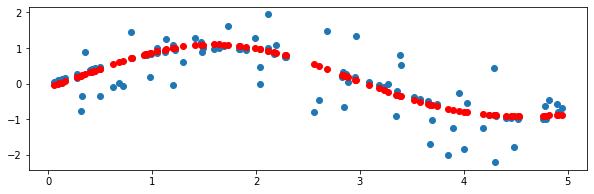

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.scatter(X_test, y_test)
ax.scatter(X_test, svr_rbf.predict(X_test), color='red')

In [45]:
liv_df = pd.read_csv('indian_liver_patient.csv').fillna(0)
liv_df['Gender'] = np.where(liv_df['Gender'] == 'Female', 0, 1)
liv_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [46]:
X = liv_df.iloc[:, :-1]
y = liv_df.loc[:, 'Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [47]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(1.0, 0.6643835616438356)

In [48]:
rand_seed = np.random.RandomState(seed=0)
X = np.sort(5 * rand_seed.rand(400, 1), axis=1)
y = np.sin(X).ravel()
T = np.linspace(0, 5, 500).reshape(-1, 1)
y[::1] += 2 * (np.random.RandomState(seed=2).rand(400) - np.random.RandomState(seed=1).rand(400))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [49]:
knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform').fit(X_train, y_train)
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance').fit(X_train, y_train)
knn_uni.score(X_test, y_test), knn_dis.score(X_test, y_test)

(0.4596406387223779, 0.39578217211801525)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


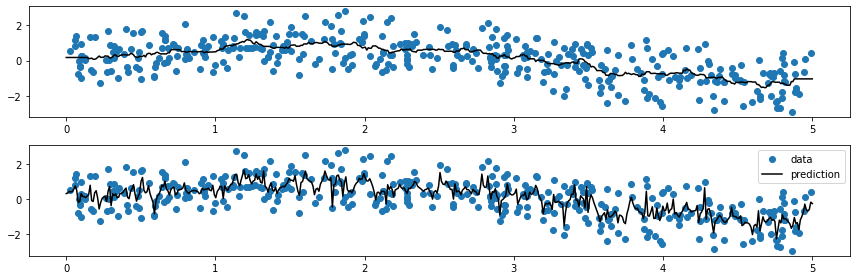

In [50]:
fig, axs = plt.subplots(2, 1, figsize=(12, 4))
for weights, ax in zip(['uniform', 'distance'], axs.ravel()):
    knn = KNeighborsRegressor(n_neighbors=20, weights=weights).fit(X, y)
    y_pred = knn.predict(T)
    ax.scatter(X.ravel(), y, label='data')
    ax.plot(T, y_pred, color='black', label='prediction')
    plt.legend()
plt.tight_layout()

In [51]:
X = liv_df.iloc[:, :-1]
y = liv_df.loc[:, 'Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [52]:
dt_cls = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
dt_cls.score(X_train, y_train), dt_cls.score(X_test, y_test)

(0.7711670480549199, 0.684931506849315)

In [53]:
dt_cls = DecisionTreeClassifier(ccp_alpha=0.01).fit(X_train, y_train)
dt_cls.score(X_train, y_train), dt_cls.score(X_test, y_test)

(0.7368421052631579, 0.6986301369863014)

In [54]:
pd.DataFrame({'name':X.columns, 'imp':dt_cls.feature_importances_})

,name,imp
0,Age,0.000000
1,Gender,0.000000
2,Total_Bilirubin,0.000000
3,Direct_Bilirubin,0.000000
4,Alkaline_Phosphotase,0.494168
5,Alamine_Aminotransferase,0.000000
6,Aspartate_Aminotransferase,0.505832
7,Total_Protiens,0.000000
8,Albumin,0.000000
9,Albumin_and_Globulin_Ratio,0.000000


In [55]:
roc_auc_score(y_test, dt_cls.predict_proba(X_test)[:, 1])

0.6865217391304348

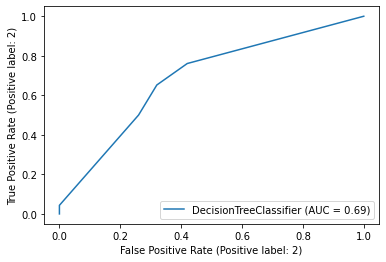

In [56]:
RocCurveDisplay.from_estimator(dt_cls, X_test, y_test)

In [57]:
rand_seed = np.random.RandomState(seed=0)
X = np.sort(5 * rand_seed.rand(400, 1), axis=1)
y = np.sin(X).ravel()
T = np.linspace(0, 5, 500).reshape(-1, 1)
y[::1] += 2 * (np.random.RandomState(seed=2).rand(400) - np.random.RandomState(seed=1).rand(400))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

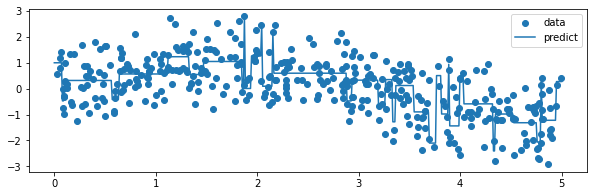

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.scatter(X, y, label='data')
dt_reg = DecisionTreeRegressor(ccp_alpha=0.005).fit(X, y)
ax.plot(T, dt_reg.predict(T), label='predict')
plt.legend()

In [59]:
can_df = pd.read_csv('breast-cancer.csv')
can_df['class'] = np.where(can_df['diagnosis']=='M', 1, 0)
can_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,class
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [60]:
X = can_df.drop(['id', 'diagnosis', 'class'], axis=1)
y = can_df.loc[:, 'class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [61]:
bag_cls = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000, solver='liblinear'), n_estimators=100, oob_score=True).fit(X_train, y_train)
bag_cls.score(X_train, y_train), bag_cls.score(X_test, y_test)

(0.9553990610328639, 0.965034965034965)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

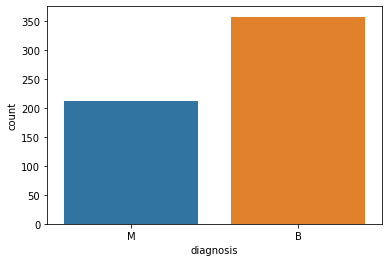

In [62]:
sns.countplot(data=can_df, x='diagnosis')

In [63]:
X_pca = PCA(n_components=2).fit_transform(X)
X_pca

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

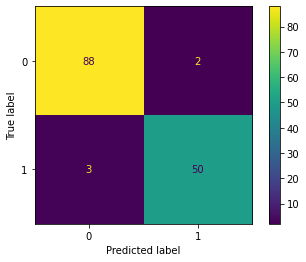

In [64]:
y_pred = bag_cls.predict(X_test)
ConfusionMatrixDisplay.from_estimator(bag_cls, X_test, y_test)

In [65]:
bag_cls.oob_score_

0.9460093896713615

In [66]:
car_df = pd.read_csv('CarPrice_Assignment.csv')
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [67]:
X = pd.get_dummies(car_df.drop(['car_ID', 'symboling', 'CarName', 'price'], axis=1))
y = car_df.loc[:, 'price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [68]:
bag_reg = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=100, oob_score=True, n_jobs=-1).fit(X_train, y_train)
bag_reg.score(X_train, y_train), bag_reg.oob_score_, bag_reg.score(X_test, y_test)

(0.949460443438733, 0.8858983365270371, 0.8204993834516019)

In [69]:
X = can_df.drop(['id', 'diagnosis', 'class'], axis=1)
y = can_df.loc[:, 'class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [70]:
ada_clf = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000), n_estimators=100).fit(X_train, y_train)
ada_clf.score(X_train, y_train), ada_clf.score(X_test, y_test)

(0.9483568075117371, 0.965034965034965)

In [71]:
X = pd.get_dummies(car_df.drop(['car_ID', 'symboling', 'CarName', 'price'], axis=1))
y = car_df.loc[:, 'price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [72]:
ada_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, loss='square').fit(X_train, y_train)
ada_reg.score(X_train, y_train), ada_reg.score(X_test, y_test)

(0.9884902593672931, 0.9038801972692266)

In [73]:
feature_importances = pd.DataFrame({'feature_names':X.columns, 'importances':ada_reg.feature_importances_}).round(3)
feature_importances.head()

,feature_names,importances
0,wheelbase,0.018
1,carlength,0.034
2,carwidth,0.020
3,carheight,0.009
4,curbweight,0.070


<AxesSubplot:xlabel='importances', ylabel='feature_names'>

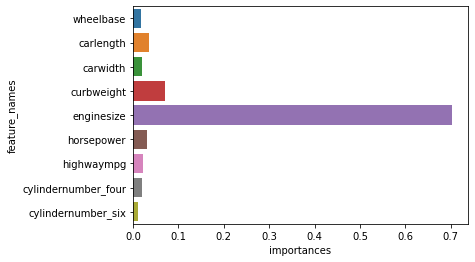

In [74]:
sns.barplot(data=feature_importances.query("importances > 0.01"), y='feature_names', x='importances')

In [81]:
# xGBoost 관련
# booster = default 'gbtree', 그 외 gblinear, dart 등
# n_jobs
# learning_rate = default 0.3
# n_estimators

xgb_reg = XGBRegressor(booster='gbtree', n_estimators=100, learning_rate=0.1, seed=0).fit(X_train, y_train)
xgb_reg.score(X_train, y_train), xgb_reg.score(X_test, y_test)

(0.9977746701883694, 0.9070068770485158)

In [82]:
X = can_df.drop(['id', 'diagnosis', 'class'], axis=1)
y = can_df.loc[:, 'class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [84]:
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, ccp_alpha=0.01, random_state=0).fit(X_train, y_train)
rf_clf.score(X_train, y_train), rf_clf.oob_score_, rf_clf.score(X_test, y_test)

(0.9765258215962441, 0.9507042253521126, 0.958041958041958)

In [85]:
roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])

0.9849056603773585

<AxesSubplot:xlabel='name'>

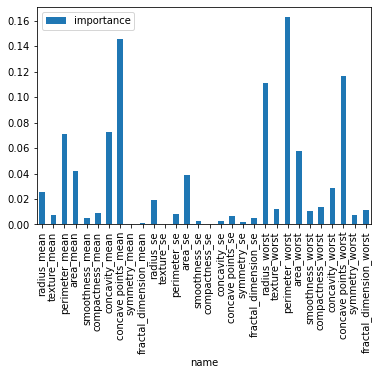

In [90]:
pd.DataFrame({'name':X.columns, 'importance':rf_clf.feature_importances_}).plot.bar(x='name', y='importance')

In [91]:
X = pd.get_dummies(car_df.drop(['car_ID', 'symboling', 'CarName', 'price'], axis=1))
y = car_df.loc[:, 'price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [96]:
rf_reg = RandomForestRegressor(n_estimators=100, oob_score=True, ccp_alpha=0.001, random_state=0).fit(X_train, y_train)
rf_reg.score(X_train, y_train), rf_reg.oob_score_, rf_reg.score(X_test, y_test)

(0.98772508390535, 0.9232425671266283, 0.9107247692909681)

<AxesSubplot:xlabel='importances', ylabel='feature_names'>

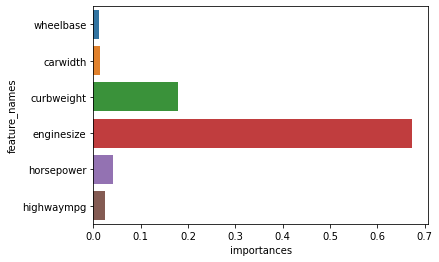

In [97]:
feature_importances = pd.DataFrame({'feature_names':X.columns, 'importances':rf_reg.feature_importances_}).round(3)
sns.barplot(data=feature_importances.query("importances > 0.01"), y='feature_names', x='importances')

In [99]:
sky_df = pd.read_csv('Skyserver.csv')
sky_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [100]:
X = sky_df.drop('class', axis=1)
y = sky_df.loc[:, 'class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [101]:
gnb = GaussianNB().fit(X_train, y_train)
gnb.score(X_train, y_train), gnb.score(X_test, y_test)

(0.7953333333333333, 0.8012)

In [104]:
print(classification_report(y_test, gnb.predict(X_test), zero_division=True))

              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1250
         QSO       1.00      0.00      0.00       212
        STAR       0.92      0.76      0.83      1038

    accuracy                           0.80      2500
   macro avg       0.89      0.58      0.56      2500
weighted avg       0.84      0.80      0.77      2500



In [109]:
spam_df = pd.read_csv('SMSSpamCollection.csv', delimiter='\t', names=['kind', 'contents'])
spam_df['label'] = np.where(spam_df['kind'] == 'spam', 1, 0)

In [110]:
X = spam_df.loc[:, 'contents']
y = spam_df.loc[:, 'label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [112]:
cv = CountVectorizer(binary=True).fit(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

In [114]:
cv.get_feature_names_out()

array(['00', '000', '008704050406', ..., 'zyada', 'ú1', '〨ud'],
      dtype=object)

In [122]:
cv.inverse_transform(X_train_cv.toarray()[[1]])

[array(['08715500022', '25p', '89693', 'area', 'at', 'chat', 'cnl', 'com',
        'free', 'gaytextbuddy', 'guys', 'horny', 'in', 'just', 'name',
        'new', 'one', 'or', 'postcode', 'receive', 'rpl', 'search', 'stop',
        'textbuddy', 'to', 'txt', 'ur'], dtype='<U34')]

In [121]:
X_train_cv.toarray()[[0]]

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [123]:
bnb = BernoulliNB().fit(X_train_cv, y_train)
bnb.score(X_train_cv, y_train), bnb.score(X_test_cv, y_test)

(0.9875568317779373, 0.9741564967695621)

In [124]:
cv = CountVectorizer(binary=False).fit(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

In [126]:
mnb = MultinomialNB().fit(X_train_cv, y_train)
mnb.score(X_train_cv, y_train), mnb.score(X_test_cv, y_test)

(0.9937784158889686, 0.9813352476669059)